In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
org_test = pd.read_csv("TEST_FINAL.csv")
org_train = pd.read_csv("TRAIN.csv")

In [3]:
org_train.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
train = org_train.copy()

In [5]:
train.drop(["ID","Store_id"],axis=1,inplace=True)

In [6]:
train.rename(columns={"#Order":"Order"},inplace=True)

In [7]:
train.head()

,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales
0,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [8]:
train.isnull().sum()

Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
Order            0
Sales            0
dtype: int64

In [9]:
train.Date = pd.to_datetime(train.Date)

In [10]:
train.dtypes

Store_Type               object
Location_Type            object
Region_Code              object
Date             datetime64[ns]
Holiday                   int64
Discount                 object
Order                     int64
Sales                   float64
dtype: object

In [11]:
train.set_index("Date",inplace=True)

In [12]:
train.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount,Order,Sales
Date,,,,,,,
2018-01-01,S1,L3,R1,1,Yes,9,7011.84
2018-01-01,S4,L2,R1,1,Yes,60,51789.12
2018-01-01,S3,L2,R1,1,Yes,42,36868.20
2018-01-01,S2,L3,R1,1,Yes,23,19715.16
2018-01-01,S2,L3,R4,1,Yes,62,45614.52


In [13]:
train.corr()

,Holiday,Order,Sales
Holiday,1.000000,-0.140496,-0.154779
Order,-0.140496,1.000000,0.941601
Sales,-0.154779,0.941601,1.000000


<AxesSubplot:xlabel='Date'>

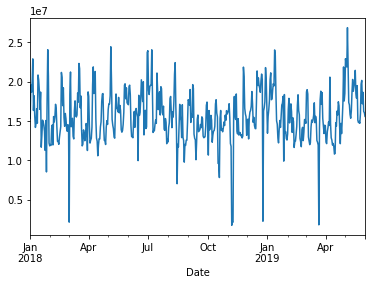

In [14]:
train.groupby(train.index)["Sales"].sum().plot()

In [15]:
org_test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [16]:
test = org_test.copy()
test.drop(["ID","Store_id"],axis=1,inplace=True)

In [17]:
test.head()

,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,S4,L2,R3,2019-06-01,0,No
1,S1,L1,R1,2019-06-01,0,No
2,S4,L2,R1,2019-06-01,0,No
3,S1,L1,R4,2019-06-01,0,No
4,S1,L1,R2,2019-06-01,0,No


In [18]:
test.Holiday.value_counts()

0    21535
1      730
Name: Holiday, dtype: int64

In [19]:
train.Holiday.value_counts()

0    163520
1     24820
Name: Holiday, dtype: int64

In [20]:
test.Date = pd.to_datetime(test.Date)

In [21]:
test.set_index("Date",inplace=True)

In [22]:
test.head()

,Store_Type,Location_Type,Region_Code,Holiday,Discount
Date,,,,,
2019-06-01,S4,L2,R3,0,No
2019-06-01,S1,L1,R1,0,No
2019-06-01,S4,L2,R1,0,No
2019-06-01,S1,L1,R4,0,No
2019-06-01,S1,L1,R2,0,No


In [23]:
train.shape

(188340, 7)

In [24]:
x_train = pd.get_dummies(train.iloc[:,0:6])

In [25]:
x_train.head()

,Holiday,Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,,
2018-01-01,1,9,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2018-01-01,1,60,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2018-01-01,1,42,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2018-01-01,1,23,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
2018-01-01,1,62,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1


In [26]:
y_train = train.iloc[:,6:7]

In [27]:
y_train.shape

(188340, 1)

In [28]:
y_train

,Sales
Date,
2018-01-01,7011.84
2018-01-01,51789.12
2018-01-01,36868.20
2018-01-01,19715.16
2018-01-01,45614.52
...,...
2019-05-31,37272.00
2019-05-31,54572.64
2019-05-31,31624.56


In [29]:
x_test = pd.get_dummies(test)

In [30]:
x_test.head()

,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,
2019-06-01,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2019-06-01,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2019-06-01,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0


In [31]:
#Model_building

In [32]:
train_dummy = pd.concat([x_train,y_train],axis=1)

In [33]:
train_dummy.head()

,Holiday,Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Sales
Date,,,,,,,,,,,,,,,,,,
2018-01-01,1,9,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,7011.84
2018-01-01,1,60,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,51789.12
2018-01-01,1,42,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,36868.20
2018-01-01,1,23,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,19715.16
2018-01-01,1,62,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,45614.52


In [34]:
corr = train_dummy.corr()

In [35]:
corr = train_dummy.corr().sort_values("Sales",ascending=False)

In [36]:
corr.head(7)

,Holiday,Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Sales
Sales,-1.547788e-01,0.941601,-0.261257,-0.351829,0.090210,0.528006,-0.065488,0.524828,-0.228720,-0.183626,-0.269462,0.154724,-0.093980,-0.019246,-0.065641,-0.323906,0.323906,1.000000
Order,-1.404963e-01,1.000000,-0.315538,-0.387503,0.069705,0.637189,-0.087640,0.515078,-0.214689,-0.168838,-0.243804,0.268874,-0.112781,-0.078781,-0.124642,-0.233374,0.233374,0.941601
Store_Type_S4,2.387016e-17,0.637189,-0.536076,-0.241744,-0.220969,1.000000,-0.169645,0.570221,-0.246823,-0.140304,-0.160496,0.320148,-0.135350,-0.104789,-0.133456,-0.001625,0.001625,0.528006
Location_Type_L2,-1.066105e-16,0.515078,-0.380264,-0.250723,0.104531,0.570221,-0.534941,1.000000,-0.255991,-0.145516,-0.166457,0.080243,-0.083614,0.012579,-0.015976,-0.001848,0.001848,0.524828
Discount_Yes,1.954527e-02,0.233374,-0.001299,-0.001808,0.001783,0.001625,-0.001657,0.001848,0.000792,-0.000940,-0.000207,0.000943,-0.002442,0.001689,-0.000169,-1.000000,1.000000,0.323906
Region_Code_R1,1.234828e-16,0.268874,-0.202022,-0.128803,0.028981,0.320148,-0.058752,0.080243,-0.042787,-0.028177,0.062491,1.000000,-0.455838,-0.398244,-0.285780,-0.000943,0.000943,0.154724
Store_Type_S3,-2.602045e-16,0.069705,-0.367347,-0.165655,1.000000,-0.220969,0.070064,0.104531,-0.080437,-0.096144,-0.109980,0.028981,-0.086108,0.070496,-0.013565,-0.001783,0.001783,0.090210


In [37]:
train_dummy.columns

Index(['Holiday', 'Order', 'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3',
       'Store_Type_S4', 'Location_Type_L1', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4',
       'Discount_No', 'Discount_Yes', 'Sales'],
      dtype='object')

In [38]:
train_selected = x_train[['Holiday', 'Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3',
       'Store_Type_S4', 'Location_Type_L1', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4',
       'Discount_No', 'Discount_Yes']]

In [39]:
train_selected.head(2)

,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,
2018-01-01,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2018-01-01,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1


In [40]:
# Since order no. is highly correlated to Sales first we will predict order and then predict sales

In [41]:
ord_x_train = x_train.copy()

In [42]:
ord_x_train.drop("Order",axis=1,inplace=True)

In [43]:
ord_y_train = x_train[["Order"]]

In [44]:
ord_y_train

,Order
Date,
2018-01-01,9
2018-01-01,60
2018-01-01,42
2018-01-01,23
2018-01-01,62
...,...
2019-05-31,51
2019-05-31,90
2019-05-31,56


In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
ord_sgd = SGDRegressor()

In [47]:
ord_sgd.fit(ord_x_train,ord_y_train)

SGDRegressor()

In [48]:
ord_predict_train = ord_sgd.predict(ord_x_train)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(ord_y_train,ord_predict_train)

0.5860454816414906

In [51]:
ord_predict_test = pd.DataFrame(ord_sgd.predict(x_test),index=x_test.index)

In [52]:
ord_predict_test

,0
Date,
2019-06-01,96.400571
2019-06-01,57.428724
2019-06-01,102.347269
2019-06-01,51.022879
2019-06-01,53.439106
...,...
2019-07-31,32.220541
2019-07-31,102.347269
2019-07-31,66.097101


In [53]:
x_test_ord = pd.concat([x_test,ord_predict_test],axis=1)

In [54]:
x_test_ord.head()

,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,0
Date,,,,,,,,,,,,,,,,,
2019-06-01,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,96.400571
2019-06-01,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,57.428724
2019-06-01,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,102.347269
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,51.022879
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,53.439106


In [55]:
x_test_ord.round({0:0})

,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,0
Date,,,,,,,,,,,,,,,,,
2019-06-01,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,96.0
2019-06-01,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,57.0
2019-06-01,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,102.0
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,51.0
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,32.0
2019-07-31,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,102.0
2019-07-31,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,66.0


In [56]:
x_test_ord.rename(columns=({0:"Order"}),inplace=True)

In [57]:
x_test_ord.Order = x_test_ord.Order.astype("int64")

In [58]:
x_test_ord.head()

,Holiday,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes,Order
Date,,,,,,,,,,,,,,,,,
2019-06-01,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,96
2019-06-01,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,57
2019-06-01,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,102
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,51
2019-06-01,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,53


In [59]:
sgd = SGDRegressor()

In [60]:
sgd.fit(x_train,y_train)
sgd_predict_train = sgd.predict(x_train)

In [61]:
r2_score(y_train,sgd_predict_train)

0.9114201521691927

In [62]:
sgd_predict_test = sgd.predict(x_test_ord)

In [63]:
pd.DataFrame(sgd_predict_test)

,0
0,5.000828e+08
1,2.932284e+08
2,5.309745e+08
3,2.623379e+08
4,2.728084e+08
...,...
22260,1.649430e+08
22261,5.309745e+08
22262,3.435004e+08
22263,2.623379e+08


In [64]:
x_test_ord.dtypes

Holiday             int64
Store_Type_S1       uint8
Store_Type_S2       uint8
Store_Type_S3       uint8
Store_Type_S4       uint8
Location_Type_L1    uint8
Location_Type_L2    uint8
Location_Type_L3    uint8
Location_Type_L4    uint8
Location_Type_L5    uint8
Region_Code_R1      uint8
Region_Code_R2      uint8
Region_Code_R3      uint8
Region_Code_R4      uint8
Discount_No         uint8
Discount_Yes        uint8
Order               int64
dtype: object

In [65]:
x_train.dtypes

Holiday             int64
Order               int64
Store_Type_S1       uint8
Store_Type_S2       uint8
Store_Type_S3       uint8
Store_Type_S4       uint8
Location_Type_L1    uint8
Location_Type_L2    uint8
Location_Type_L3    uint8
Location_Type_L4    uint8
Location_Type_L5    uint8
Region_Code_R1      uint8
Region_Code_R2      uint8
Region_Code_R3      uint8
Region_Code_R4      uint8
Discount_No         uint8
Discount_Yes        uint8
dtype: object

In [66]:
pop = x_test_ord.pop("Order")
x_test_ord.insert(1,"Order",pop)

In [68]:
x_test_ord

,Holiday,Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,,
2019-06-01,0,96,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2019-06-01,0,57,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2019-06-01,0,102,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2019-06-01,0,51,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2019-06-01,0,53,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-31,0,32,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
2019-07-31,0,102,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2019-07-31,0,66,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [69]:
sgd_predict_test = pd.DataFrame(sgd.predict(x_test_ord),columns=["Sales"])

In [70]:
sgd_predict_test = pd.concat([org_test.ID,sgd_predict_test],axis=1)

In [71]:
sgd_predict_test.set_index("ID",inplace=True)

In [72]:
sgd_predict_test

,Sales
ID,
T1188341,57281.410959
T1188342,35801.160988
T1188343,58849.153855
T1188344,33813.990615
T1188345,34417.379195
...,...
T1210601,17802.985350
T1210602,58849.153855
T1210603,46507.007871


In [73]:
sgd_predict_test.to_csv("Gradient_Descent.csv")

In [74]:
from sklearn.metrics import mean_squared_log_error

In [75]:
x_test_ord.head()

,Holiday,Order,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Discount_No,Discount_Yes
Date,,,,,,,,,,,,,,,,,
2019-06-01,0,96,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0
2019-06-01,0,57,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
2019-06-01,0,102,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
2019-06-01,0,51,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0
2019-06-01,0,53,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0
